<a href="https://colab.research.google.com/github/Thusharkanth/Technical-Assignment-Enhanzer-company-/blob/main/Technical_Assignment_Enhanzer_company_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing nessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [2]:
# Loading the dataset iris

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
# Display the datset

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# display the informations of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# display the satatical summary of the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


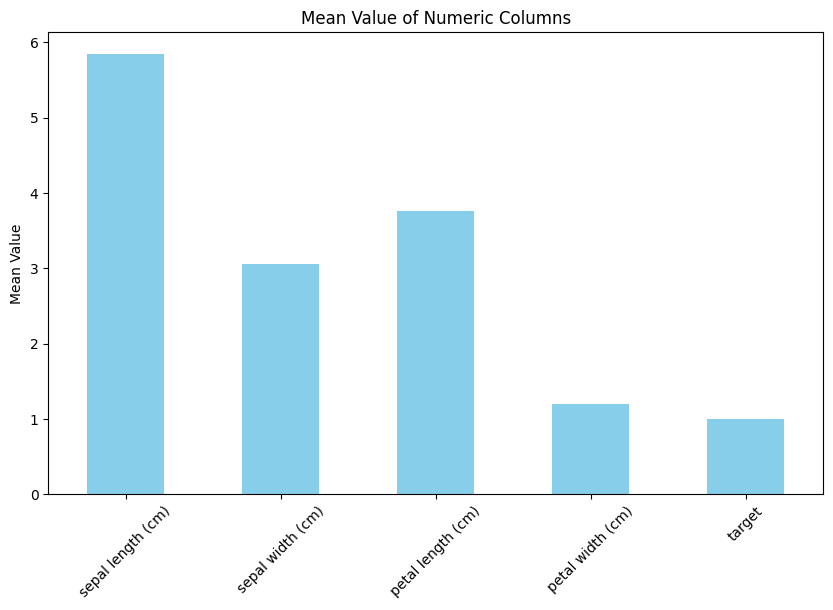

In [6]:
# For numeric columns, plot the sum or mean of each column as a bar chart
numeric_columns = df.select_dtypes(include=['number']).columns  # Select numeric columns

# Plotting the mean for each numeric column
mean_values = df[numeric_columns].mean()

# Bar chart for the mean of numeric columns
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.title('Mean Value of Numeric Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


In [7]:
# checking for missing values in the datset

df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [8]:
# detecting class imbalance

print(df['target'].value_counts())


target
0    50
1    50
2    50
Name: count, dtype: int64


## preprocessing

In [9]:
# Spliting the data set

# Seperarting the features aand target

X= df.drop(columns='target')

y = df['target']

# Spliting the data in 80% and 20% rqatio

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


## 3. Build the Machine Learning Model

In [10]:
# train the datset using randomforest model

# # Initialize and train the Random Forest model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make prediction

y_prediction = model.predict(X_test)

# Evaluate the model's performance using accuracy.

accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy*100} %")


Accuracy: 100.0 %


## 4. Visualize the Results

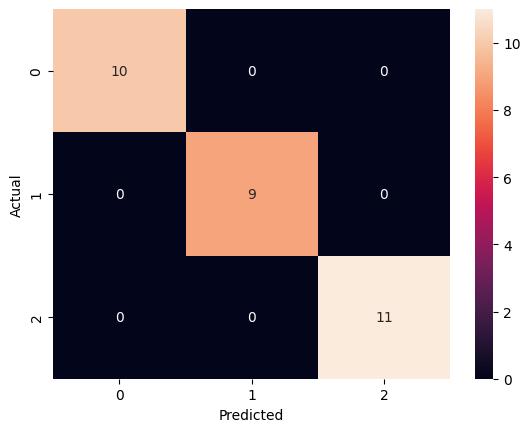

In [11]:
# plotting the confusion martix

cm = confusion_matrix(y_test, y_prediction)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5. Save the Model for Future Use


In [13]:
# saving the model usinng joblib

import joblib

# Save the trained model
joblib.dump(model, "iris_model.pkl")

# Load the saved model
loaded_model = joblib.load("iris_model.pkl")

# Test loading the model with a sample prediction
sample_prediction = loaded_model.predict([X_test.iloc[0]])
print(f"Sample Prediction: {iris.target_names[sample_prediction[0]]}")


Sample Prediction: versicolor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
